# Verkeersimulatie

In dit document ga ik de werking van mijn code voor de verkeersimulatie opdracht uitleggen.

## Snelheid

Hieronder kan het pad naar het CSV bestand worden aangepast indien nodig.

In [2]:
speed_file_path = 'examples/verkeerssimulatie-rechteweg-posities.csv'

Onderstaande functie parst de data vanuit het CSV bestand naar een bruikbaar multidimendionaal array, In dit array komt voor iedere auto een sub-array, hierin komt te staan wat de snelheid op ieder tijdstip was. Dit word berekent door de oude positie van de nieuwe positie af te halen, dit geeft meter per seconde, dan vermenigvuldigen wij met 3,6 om er kilometer per uur van te maken.

In [3]:
import csv
import matplotlib.pyplot as plt

def parse_speed_csv(file_path):
    with open(file_path, newline='') as f:
        reader = csv.reader(f,  delimiter=';')
        original_position = next(reader)
        cars_data = []
        
        for car in range(1, len(original_position)):
            cars_data.append([])

        previous_row = None
        for row in reader:
            for car in range(1, len(row)):
                row[car] = float(row[car])

                if not previous_row:
                    continue

                cars_data[car - 1].append((row[car] - previous_row[car]) * 3.6)

            previous_row = row

        return cars_data

Nu komt het makkelijkere gedeelte, wij hoefen nu alleen nog de Maximum en Minimum snelheid te zoeken en een mooie grafiek te maken.

De Maximale en Minimale snelheid vinden wij doormiddel van de max en min functies van python, deze functies zoeken door een array naar de hoogste of laagste waarde.

Voor de grafiek maken wij gebruik van MatPlotLib, wij hoeven alleen het array met de data te geven aan MatPlotLib met een label van wat het is, en de rest word voor ons gedaan.

Auto 0
	 Minimum snelheid: 0.45719999999982974
	 Maximum snelheid: 2.286000000000172

Auto 1
	 Minimum snelheid: 0.0
	 Maximum snelheid: 0.7200000000000103



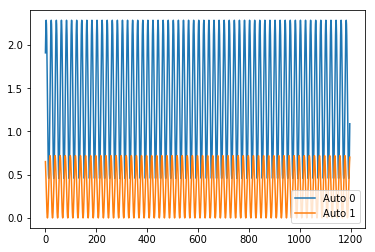

In [4]:
cars = parse_speed_csv(speed_file_path)

for car in range(len(cars)):
    plt.plot(cars[car], label='Auto ' + str(car))

    # Print data
    print('Auto ' + str(car))
    print('\t Minimum snelheid: ' + str(min(cars[car])))
    print('\t Maximum snelheid: ' + str(max(cars[car])) + '\n')

plt.legend(loc='lower right')
plt.show()

## Ongeluk

Hieronder kan het pad naar het CSV bestand worden aangepast indien nodig.

In [5]:
accident_file_path = 'examples/verkeerssimulatie-rechteweg-snelheden.csv'

Deze functie parst de CSV naar een array wat wij hierna kunnen gebruiken

In [6]:
def parse_accident_csv(file_path):
    with open(file_path, newline='') as f:
        reader = csv.reader(f, delimiter=';')
        original_position = next(reader)
        cars_data = []

        for car in range(1, len(original_position)):
            cars_data.append([])

        previous_row = original_position
        for row in reader:
            for car in range(1, len(row)):
                row[car] = float(row[car]) + float(previous_row[car])
                cars_data[car - 1].append(row[car])

            previous_row = row

        return cars_data

Deze functie zoekt naar een ongeluk tussen de auto's, de functie begint bij de eerste auto en controlleert dan voor iedere tijdstip of de 2 auto's een ongeluk hebben, als hij niks kan vinden gaat hij door naar de volgende auto.

In [7]:
def find_accident(cars):
    for car_index in range(len(cars)):
        car = cars[car_index]
        for secondary_car in cars[car_index + 1:]:
            for timestamp in range(len(car)):
                if is_accident(car[timestamp], secondary_car[timestamp]):
                    return timestamp, car, secondary_car
                
    return None

Deze functie laat weten of dat 2 posities een ongeluk zijn of niet.

In [8]:
def is_accident(first_position, second_position):
    min_for_accident = first_position - 1
    max_for_accident = first_position + 1
    
    return(second_position < max_for_accident and second_position > min_for_accident)

Eerst gaan wij op zoek naar het eerste ongeluk, doormiddel van de 'find_accident' functie.

In [9]:
cars = parse_accident_csv(accident_file_path)

timestamp, primary_accident_car, secondary_accident_car = find_accident(cars)

print("Het 1e ongeluk is op tijdstip " +
      str(timestamp) + " Omdat Auto " +
      str(cars.index(primary_accident_car)) +
      " op locatie " +
      str(primary_accident_car[timestamp]) +
      " was en Auto " +
      str(cars.index(secondary_accident_car)) +
      " op locatie " +
      str(secondary_accident_car[timestamp]))

Het 1e ongeluk is op tijdstip 0 Omdat Auto 0 op locatie 3.81 was en Auto 2 op locatie 4.5


Nu gaan wij een grafiek maken van de afstand/tijd van de auto's

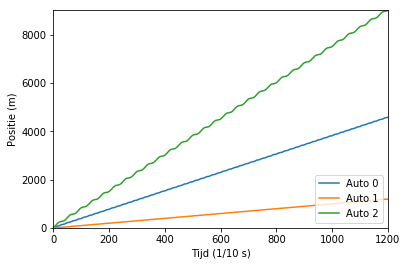

In [11]:
for car in range(len(cars)):
    plt.plot(cars[car], label='Auto ' + str(car))

plt.xlim([0, len(cars[0])])
plt.ylim([0, max(map(max, cars))])

plt.xlabel('Tijd (1/10 s)')
plt.ylabel('Positie (m)')

plt.legend(loc='lower right')
plt.show()